<a href="https://colab.research.google.com/github/panjipalguna/BDT2017/blob/master/Tugas_Akhir_Prediksi_Besarnya_Gaji_Algoritma_KNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Tugas Akhir: Memprediksi Besarnya Gaji (Algoritma KNN)
## Oleh: Moh. Ridwan

In [ ]:
# import library yang diperlukan

import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
from sklearn.metrics import roc_auc_score
from sklearn.model_selection import train_test_split

In [ ]:
# Read Data
df_test = pd.read_csv('pendapatan_test.csv')
df_train = pd.read_csv('pendapatan_train.csv')

In [ ]:
# Melihat lima data teratas
df_test.head()

,id,Umur,Kelas Pekerja,Berat Akhir,Pendidikan,Jmlh Tahun Pendidikan,Status Perkawinan,Pekerjaan,Jenis Kelamin,Keuntungan Kapital,Kerugian Capital,Jam per Minggu
0,28794,31,Pemerintah Provinsi,207301,SMA,9,Menikah,Pemuka Agama,Perempuan,0.0,0.0,40.0
1,28795,34,Wiraswasta,324254,SMA,9,Menikah,Mesin Inspeksi,Laki2,0.0,0.0,40.0
2,28796,58,Wiraswasta,27385,SMA,9,Menikah,Ekesekutif Managerial,Laki2,0.0,0.0,60.0
3,28797,49,Wiraswasta,723746,SMA,9,Menikah,Perbaikan Kerajinan,Laki2,0.0,0.0,43.0
4,28798,60,Wiraswasta,194980,SMA,9,Berpisah,Pemuka Agama,Perempuan,0.0,0.0,20.0


In [ ]:
df_train.head()

,id,Umur,Kelas Pekerja,Berat Akhir,Pendidikan,Jmlh Tahun Pendidikan,Status Perkawinan,Pekerjaan,Jenis Kelamin,Keuntungan Kapital,Kerugian Capital,Jam per Minggu,Gaji
0,0,40,Wiraswasta,205047,SMA,9,Menikah LDR,Perbaikan Kerajinan,Laki2,0.0,0.0,40.0,>7jt
1,1,33,Pemerintah Lokal,298785,10th,6,Cerai,Supir,Laki2,0.0,0.0,40.0,<=7jt
2,2,26,Wiraswasta,106856,D4,11,Belum Pernah Menikah,Pemuka Agama,Perempuan,0.0,0.0,40.0,<=7jt
3,3,54,Pekerja Bebas Perusahaan,117674,Sarjana,13,Menikah,Sales,Laki2,0.0,0.0,40.0,>7jt
4,4,48,Wiraswasta,268234,SMA,9,Cerai,Perbaikan Kerajinan,Laki2,0.0,0.0,50.0,<=7jt


In [ ]:
# Melihat informasi data
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9599 entries, 0 to 9598
Data columns (total 12 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   id                     9599 non-null   int64  
 1   Umur                   9599 non-null   int64  
 2   Kelas Pekerja          9599 non-null   object 
 3   Berat Akhir            9599 non-null   int64  
 4   Pendidikan             9599 non-null   object 
 5   Jmlh Tahun Pendidikan  9599 non-null   int64  
 6   Status Perkawinan      9599 non-null   object 
 7   Pekerjaan              9599 non-null   object 
 8   Jenis Kelamin          9599 non-null   object 
 9   Keuntungan Kapital     9599 non-null   float64
 10  Kerugian Capital       9599 non-null   float64
 11  Jam per Minggu         9599 non-null   float64
dtypes: float64(3), int64(4), object(5)
memory usage: 900.0+ KB


In [ ]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 28794 entries, 0 to 28793
Data columns (total 13 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   id                     28794 non-null  int64  
 1   Umur                   28794 non-null  int64  
 2   Kelas Pekerja          28794 non-null  object 
 3   Berat Akhir            28794 non-null  int64  
 4   Pendidikan             28794 non-null  object 
 5   Jmlh Tahun Pendidikan  28794 non-null  int64  
 6   Status Perkawinan      28794 non-null  object 
 7   Pekerjaan              28794 non-null  object 
 8   Jenis Kelamin          28794 non-null  object 
 9   Keuntungan Kapital     28794 non-null  float64
 10  Kerugian Capital       28794 non-null  float64
 11  Jam per Minggu         28794 non-null  float64
 12  Gaji                   28794 non-null  object 
dtypes: float64(3), int64(4), object(6)
memory usage: 2.9+ MB


In [ ]:
# Melihat type data
df_test.dtypes

id                         int64
Umur                       int64
Kelas Pekerja             object
Berat Akhir                int64
Pendidikan                object
Jmlh Tahun Pendidikan      int64
Status Perkawinan         object
Pekerjaan                 object
Jenis Kelamin             object
Keuntungan Kapital       float64
Kerugian Capital         float64
Jam per Minggu           float64
dtype: object

In [ ]:
df_train.dtypes

id                         int64
Umur                       int64
Kelas Pekerja             object
Berat Akhir                int64
Pendidikan                object
Jmlh Tahun Pendidikan      int64
Status Perkawinan         object
Pekerjaan                 object
Jenis Kelamin             object
Keuntungan Kapital       float64
Kerugian Capital         float64
Jam per Minggu           float64
Gaji                      object
dtype: object

In [ ]:
# Identifikasi data numerik dan data kategorik
data_numerik = []
data_kategorik = []
for i in df_train.keys():
    if df_train[i].dtype == 'O':
        data_kategorik.append(i)
    else:
        data_numerik.append(i)
print('data_kategorik =', data_kategorik)
print('data_numerik =', data_numerik)

data_kategorik = ['Kelas Pekerja', 'Pendidikan', 'Status Perkawinan', 'Pekerjaan', 'Jenis Kelamin', 'Gaji']
data_numerik = ['id', 'Umur', 'Berat Akhir', 'Jmlh Tahun Pendidikan', 'Keuntungan Kapital', 'Kerugian Capital', 'Jam per Minggu']


In [ ]:
data_numerik = []
data_kategorik = []
for i in df_test.keys():
    if df_test[i].dtype == 'O':
        data_kategorik.append(i)
    else:
        data_numerik.append(i)
print('data_kategorik =', data_kategorik)
print('data_numerik =', data_numerik)

data_kategorik = ['Kelas Pekerja', 'Pendidikan', 'Status Perkawinan', 'Pekerjaan', 'Jenis Kelamin']
data_numerik = ['id', 'Umur', 'Berat Akhir', 'Jmlh Tahun Pendidikan', 'Keuntungan Kapital', 'Kerugian Capital', 'Jam per Minggu']


In [ ]:
# Mengetahui nilai yang berbeda di setiap kolom dengan data kategorik
for i in df_train.keys():
    if i in data_kategorik:
        print(f'{i} :',set(df_train[i]))

Kelas Pekerja : {'Pekerja Bebas Perusahaan', 'Wiraswasta', 'Pemerintah Lokal', 'Pemerintah Negara', 'Tanpa di Bayar', 'Pekerja Bebas Bukan Perusahan', '?', 'Tidak Pernah Bekerja', 'Pemerintah Provinsi'}
Pendidikan : {'10th', '11th', '7th-8th', 'D3', '5th-6th', 'SD', 'SMA', 'Sarjana', '12th', 'Pendidikan Tinggi', 'D4', 'Doktor', '9th', '1st-4th', 'Master', 'Sekolah Professional'}
Status Perkawinan : {'Cerai', 'Belum Pernah Menikah', 'Janda', 'Berpisah', 'Menikah LDR', 'Menikah'}
Pekerjaan : {'Ekesekutif Managerial', 'Pemuka Agama', '?', 'Tentara', 'Asisten Rumah Tangga', 'Penjaga', 'Pembersih', 'Mesin Inspeksi', 'Tech-support', 'Perbaikan Kerajinan', 'Petani', 'Spesialis', 'Sales', 'Servis Lainnya', 'Supir'}
Jenis Kelamin : {'Perempuan', 'Laki2'}


In [ ]:
for i in df_test.keys():
    if i in data_kategorik:
        print(f'{i} :',set(df_test[i]))

Kelas Pekerja : {'Pekerja Bebas Perusahaan', 'Wiraswasta', 'Pemerintah Lokal', 'Pemerintah Negara', 'Tanpa di Bayar', 'Pekerja Bebas Bukan Perusahan', '?', 'Tidak Pernah Bekerja', 'Pemerintah Provinsi'}
Pendidikan : {'11th', '10th', '1st-4th', '7th-8th', 'D3', '5th-6th', 'SD', 'SMA', 'Sarjana', 'Pendidikan Tinggi', 'D4', 'Doktor', '9th', '12th', 'Master', 'Sekolah Professional'}
Status Perkawinan : {'Cerai', 'Belum Pernah Menikah', 'Janda', 'Berpisah', 'Menikah LDR', 'Menikah'}
Pekerjaan : {'Ekesekutif Managerial', 'Pemuka Agama', '?', 'Tentara', 'Asisten Rumah Tangga', 'Penjaga', 'Mesin Inspeksi', 'Pembersih', 'Tech-support', 'Perbaikan Kerajinan', 'Petani', 'Spesialis', 'Sales', 'Servis Lainnya', 'Supir'}
Jenis Kelamin : {'Perempuan', 'Laki2'}


In [ ]:
# Mengganti nilai '?' menjadi NaN
df_train = df_train.replace('?', np.nan)

In [ ]:
df_test = df_test.replace('?', np.nan)

In [ ]:
# Mengecek jumlah data Null
df_train.isnull().sum()

id                          0
Umur                        0
Kelas Pekerja            1660
Berat Akhir                 0
Pendidikan                  0
Jmlh Tahun Pendidikan       0
Status Perkawinan           0
Pekerjaan                1665
Jenis Kelamin               0
Keuntungan Kapital          0
Kerugian Capital            0
Jam per Minggu              0
Gaji                        0
dtype: int64

In [ ]:
df_test.isnull().sum()

id                         0
Umur                       0
Kelas Pekerja            544
Berat Akhir                0
Pendidikan                 0
Jmlh Tahun Pendidikan      0
Status Perkawinan          0
Pekerjaan                545
Jenis Kelamin              0
Keuntungan Kapital         0
Kerugian Capital           0
Jam per Minggu             0
dtype: int64

In [ ]:
# Mengganti nilai data nan dengan mode
df_train['Kelas Pekerja'] = df_train['Kelas Pekerja'].replace(np.nan, df_train.mode(axis=0).loc[0]['Kelas Pekerja'])
df_train['Pekerjaan'] = df_train['Pekerjaan'].replace(np.nan, df_train.mode(axis=0).loc[0]['Pekerjaan'])

In [ ]:
df_test['Kelas Pekerja'] = df_test['Kelas Pekerja'].replace(np.nan, df_test.mode(axis=0).loc[0]['Kelas Pekerja'])
df_test['Pekerjaan'] = df_test['Pekerjaan'].replace(np.nan, df_test.mode(axis=0).loc[0]['Pekerjaan'])

In [ ]:
# Memformat ulang kolom data kategorik
df_train['Kelas Pekerja']=df_train['Kelas Pekerja'].replace({'Tidak Pernah Bekerja':0, 'Tanpa di Bayar':1, 'Pekerja Bebas Bukan Perusahan':2,
                                                    'Wiraswasta':3, 'Pekerja Bebas Perusahaan':4, 'Pemerintah Lokal':5,
                                                    'Pemerintah Provinsi':6, 'Pemerintah Negara':7})
df_train['Pendidikan']=df_train['Pendidikan'].replace({'1st-4th':0, '5th-6th':1,  'SD':2, '7th-8th':3, '9th':4, '10th':5,
                                                 '11th':6, '12th':7, 'SMA':8, 'Sekolah Professional':9, 'Pendidikan Tinggi':10,
                                                 'D3':11, 'D4':12, 'Sarjana':13, 'Master':14, 'Doktor':15})
df_train['Pekerjaan']=df_train['Pekerjaan'].replace({'Pembersih':1, 'Asisten Rumah Tangga':2, 'Penjaga':3, 'Supir':4, 'Perbaikan Kerajinan':5,
                                                'Servis Lainnya':6, 'Petani':7, 'Pemuka Agama':8, 'Sales':9, 'Tech-support':10,
                                                'Mesin Inspeksi':11, 'Tentara':12, 'Spesialis':13, 'Ekesekutif Managerial':14})
df_train['Gaji']=df_train['Gaji'].replace({'<=7jt': 0, '>7jt': 1})
df_train['Status Perkawinan']=df_train['Status Perkawinan'].replace({'Menikah LDR':0, 'Menikah':1, 'Belum Pernah Menikah':2,
                                                                     'Cerai':3, 'Janda':4, 'Berpisah':5})
df_train['Jenis Kelamin']=df_train['Jenis Kelamin'].replace({'Laki2': 0, 'Perempuan': 1})

# menghapus kolom id
df_train = df_train.drop(['id'], axis=1)

df_train.head()

,Umur,Kelas Pekerja,Berat Akhir,Pendidikan,Jmlh Tahun Pendidikan,Status Perkawinan,Pekerjaan,Jenis Kelamin,Keuntungan Kapital,Kerugian Capital,Jam per Minggu,Gaji
0,40,3,205047,8,9,0,5,0,0.0,0.0,40.0,1
1,33,5,298785,5,6,3,4,0,0.0,0.0,40.0,0
2,26,3,106856,12,11,2,8,1,0.0,0.0,40.0,0
3,54,4,117674,13,13,1,9,0,0.0,0.0,40.0,1
4,48,3,268234,8,9,3,5,0,0.0,0.0,50.0,0


In [ ]:
df_test['Kelas Pekerja']=df_test['Kelas Pekerja'].replace({'Tidak Pernah Bekerja':0, 'Tanpa di Bayar':1, 'Pekerja Bebas Bukan Perusahan':2,
                                                    'Wiraswasta':3, 'Pekerja Bebas Perusahaan':4, 'Pemerintah Lokal':5,
                                                    'Pemerintah Provinsi':6, 'Pemerintah Negara':7})
df_test['Pendidikan']=df_test['Pendidikan'].replace({'1st-4th':0, '5th-6th':1,  'SD':2, '7th-8th':3, '9th':4, '10th':5,
                                                 '11th':6, '12th':7, 'SMA':8, 'Sekolah Professional':9, 'Pendidikan Tinggi':10,
                                                 'D3':11, 'D4':12, 'Sarjana':13, 'Master':14, 'Doktor':15})
df_test['Pekerjaan']=df_test['Pekerjaan'].replace({'Pembersih':1, 'Asisten Rumah Tangga':2, 'Penjaga':3, 'Supir':4, 'Perbaikan Kerajinan':5,
                                                'Servis Lainnya':6, 'Petani':7, 'Pemuka Agama':8, 'Sales':9, 'Tech-support':10,
                                                'Mesin Inspeksi':11, 'Tentara':12, 'Spesialis':13, 'Ekesekutif Managerial':14})
df_test['Status Perkawinan']=df_test['Status Perkawinan'].replace({'Menikah LDR':0, 'Menikah':1, 'Belum Pernah Menikah':2,
                                                                     'Cerai':3, 'Janda':4, 'Berpisah':5})
df_test['Jenis Kelamin']=df_test['Jenis Kelamin'].replace({'Laki2': 0, 'Perempuan': 1})

# menghapus kolom id
df_test = df_test.drop(['id'], axis=1)

df_test.head()

,Umur,Kelas Pekerja,Berat Akhir,Pendidikan,Jmlh Tahun Pendidikan,Status Perkawinan,Pekerjaan,Jenis Kelamin,Keuntungan Kapital,Kerugian Capital,Jam per Minggu
0,31,6,207301,8,9,1,8,1,0.0,0.0,40.0
1,34,3,324254,8,9,1,11,0,0.0,0.0,40.0
2,58,3,27385,8,9,1,14,0,0.0,0.0,60.0
3,49,3,723746,8,9,1,5,0,0.0,0.0,43.0
4,60,3,194980,8,9,5,8,1,0.0,0.0,20.0


In [ ]:
# melihat statistika deskriptif pada data
df_train.describe()

,Umur,Kelas Pekerja,Berat Akhir,Pendidikan,Jmlh Tahun Pendidikan,Status Perkawinan,Pekerjaan,Jenis Kelamin,Keuntungan Kapital,Kerugian Capital,Jam per Minggu,Gaji
count,28794.000000,28794.000000,2.879400e+04,28794.000000,28794.000000,28794.000000,28794.000000,28794.000000,2.879400e+04,2.879400e+04,28794.000000,28794.000000
mean,38.557095,3.331701,1.897640e+05,9.502014,10.075919,1.806036,8.815969,0.333646,1.547702e+07,1.221002e+06,40.398555,0.236890
std,13.668667,1.081619,1.047810e+05,2.876535,2.561954,1.008485,3.785187,0.471523,1.063346e+08,5.633757e+06,12.371845,0.425181
min,17.000000,0.000000,1.349200e+04,0.000000,1.000000,0.000000,1.000000,0.000000,0.000000e+00,0.000000e+00,1.000000,0.000000
25%,28.000000,3.000000,1.178668e+05,8.000000,9.000000,1.000000,6.000000,0.000000,0.000000e+00,0.000000e+00,40.000000,0.000000
50%,37.000000,3.000000,1.785235e+05,10.000000,10.000000,2.000000,9.000000,0.000000,0.000000e+00,0.000000e+00,40.000000,0.000000
75%,48.000000,3.000000,2.373860e+05,12.000000,12.000000,2.000000,13.000000,1.000000,0.000000e+00,0.000000e+00,45.000000,0.000000
max,90.000000,7.000000,1.490400e+06,15.000000,16.000000,5.000000,14.000000,1.000000,1.399986e+09,6.098400e+07,99.000000,1.000000


In [ ]:
df_test.describe()

,Umur,Kelas Pekerja,Berat Akhir,Pendidikan,Jmlh Tahun Pendidikan,Status Perkawinan,Pekerjaan,Jenis Kelamin,Keuntungan Kapital,Kerugian Capital,Jam per Minggu
count,9599.000000,9599.000000,9.599000e+03,9599.000000,9599.000000,9599.000000,9599.000000,9599.000000,9.599000e+03,9.599000e+03,9599.000000
mean,39.024378,3.341702,1.896029e+05,9.526930,10.103552,1.798521,8.329722,0.320658,1.431539e+07,1.187658e+06,40.566830
std,13.767176,1.108475,1.079328e+05,2.920863,2.611966,1.005835,3.752494,0.466754,9.852723e+07,5.554308e+06,12.414974
min,17.000000,0.000000,1.228500e+04,0.000000,1.000000,0.000000,1.000000,0.000000,0.000000e+00,0.000000e+00,1.000000
25%,28.000000,3.000000,1.171600e+05,8.000000,9.000000,1.000000,5.000000,0.000000,0.000000e+00,0.000000e+00,40.000000
50%,38.000000,3.000000,1.778390e+05,10.000000,10.000000,2.000000,8.000000,0.000000,0.000000e+00,0.000000e+00,40.000000
75%,48.000000,3.000000,2.383485e+05,12.000000,13.000000,2.000000,13.000000,1.000000,0.000000e+00,0.000000e+00,45.000000
max,90.000000,7.000000,1.484705e+06,15.000000,16.000000,5.000000,14.000000,1.000000,1.399986e+09,5.278000e+07,99.000000


In [ ]:
# Standarisasi
col = df_train.keys()

stdscalar = StandardScaler()
datascale = stdscalar.fit_transform(df_train)

df_train_S = pd.DataFrame(datascale, columns=col)
df_train_S.head()

,Umur,Kelas Pekerja,Berat Akhir,Pendidikan,Jmlh Tahun Pendidikan,Status Perkawinan,Pekerjaan,Jenis Kelamin,Keuntungan Kapital,Kerugian Capital,Jam per Minggu,Gaji
0,0.105565,-0.306676,0.145859,-0.522170,-0.419967,-1.790871,-1.008150,-0.707604,-0.145553,-0.216733,-0.032215,1.794819
1,-0.406564,1.542436,1.040483,-1.565109,-1.590969,1.183939,-1.272342,-0.707604,-0.145553,-0.216733,-0.032215,-0.557159
2,-0.918693,-0.306676,-0.791264,0.868416,0.360700,0.192335,-0.215573,1.413220,-0.145553,-0.216733,-0.032215,-0.557159
3,1.129823,0.617880,-0.688019,1.216062,1.141368,-0.799268,0.048620,-0.707604,-0.145553,-0.216733,-0.032215,1.794819
4,0.690855,-0.306676,0.748908,-0.522170,-0.419967,1.183939,-1.008150,-0.707604,-0.145553,-0.216733,0.776086,-0.557159


In [ ]:
col = df_test.keys()

stdscalar = StandardScaler()
datascale = stdscalar.fit_transform(df_test)

df_test_S = pd.DataFrame(datascale, columns=col)
df_test_S.head()

,Umur,Kelas Pekerja,Berat Akhir,Pendidikan,Jmlh Tahun Pendidikan,Status Perkawinan,Pekerjaan,Jenis Kelamin,Keuntungan Kapital,Kerugian Capital,Jam per Minggu
0,-0.582893,2.398283,0.163982,-0.522794,-0.422521,-0.793930,-0.087872,1.455535,-0.145301,-0.213838,-0.045659
1,-0.364972,-0.308280,1.247611,-0.522794,-0.422521,-0.793930,0.711638,-0.687032,-0.145301,-0.213838,-0.045659
2,1.378395,-0.308280,-1.503031,-0.522794,-0.422521,-0.793930,1.511148,-0.687032,-0.145301,-0.213838,1.565382
3,0.724632,-0.308280,4.949107,-0.522794,-0.422521,-0.793930,-0.887382,-0.687032,-0.145301,-0.213838,0.195997
4,1.523676,-0.308280,0.049822,-0.522794,-0.422521,3.183072,-0.087872,1.455535,-0.145301,-0.213838,-1.656701


In [ ]:
# Melihat keseimbangan data Gaji
df_train['Gaji'].value_counts()

0    21973
1     6821
Name: Gaji, dtype: int64

In [ ]:
# memisah data depanden dan independen
# Pemilihan data train, dan data test
X_train = df_train.drop('Gaji', axis=1)
y_train = df_train['Gaji']
y_train = y_train

X_test = df_test

In [ ]:
# Algoritma KNN
# Ujicoba tuning hyperparameter KNN
model = KNeighborsClassifier()
param_grids = {'n_neighbors':np.arange(10,30), 'weights': ['uniform','distance']}
rscv = RandomizedSearchCV(model, param_distributions=param_grids, n_iter=25, scoring='roc_auc', cv=5)
rscv.fit(X_train,y_train)

RandomizedSearchCV(cv=5, error_score=nan,
                   estimator=KNeighborsClassifier(algorithm='auto',
                                                  leaf_size=30,
                                                  metric='minkowski',
                                                  metric_params=None,
                                                  n_jobs=None, n_neighbors=5,
                                                  p=2, weights='uniform'),
                   iid='deprecated', n_iter=25, n_jobs=None,
                   param_distributions={'n_neighbors': array([10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26,
       27, 28, 29]),
                                        'weights': ['uniform', 'distance']},
                   pre_dispatch='2*n_jobs', random_state=None, refit=True,
                   return_train_score=False, scoring='roc_auc', verbose=0)

In [ ]:
# Mendapatkan hyperparameter dan score terbaik
print(rscv.best_params_)
print(rscv.best_score_)

{'weights': 'distance', 'n_neighbors': 18}
0.7265260082208188


In [ ]:
# Gunakan hyperparameter terbaik setelah tuning pada model KNN
model_knn = KNeighborsClassifier(n_neighbors=10, weights='distance')
model_knn.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=10, p=2,
                     weights='distance')

In [ ]:
# Lakukan train model dan prediksi data test
model_knn.fit(X_train, y_train)
y_predict_train = model_knn.predict(X_train)
y_predict_test = model_knn.predict(X_test)
print(y_predict_train)
print(y_predict_test)

[1 0 0 ... 0 0 0]
[0 0 0 ... 0 0 0]


In [ ]:
# Validasi hasil prediksi data train dan test
from sklearn.metrics import accuracy_score 
print('Score data train', accuracy_score(y_train, y_predict_train))

Score data train 0.9998958116274224


In [ ]:
# Ubah data test menjadi data Frame
df = pd.read_csv('pendapatan_test.csv')
hasil = pd.DataFrame(y_predict_test, columns=['Gaji'], index=df['id'])
hasil

,Gaji
id,
28794,0
28795,0
28796,0
28797,0
28798,0
...,...
38388,1
38389,1
38390,0


In [ ]:
# Simpan data test pada file csv
hasil.to_csv('salary_prediction.csv')

In [ ]:
Gaji_kurang_sama_7jt = 0
Gaji_diatas_7jt = 0
for i in hasil['Gaji']:
    if i == 0:
        Gaji_kurang_sama_7jt += 1
    else:
        Gaji_diatas_7jt +=1
        
Daftar = {'Gaji':['<=7jt', '>7jt'], 'Jumlah':[Gaji_kurang_sama_7jt, Gaji_diatas_7jt]}
Daftar_Gaji = pd.DataFrame(Daftar)
Daftar_Gaji

,Gaji,Jumlah
0,<=7jt,8383
1,>7jt,1216


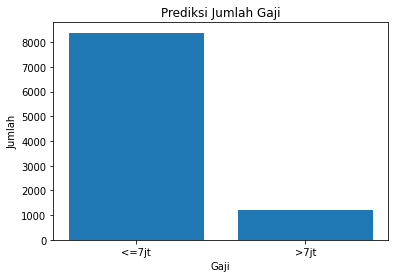

In [ ]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots()
ax.bar(Daftar['Gaji'], Daftar['Jumlah'])
ax.set_xlabel('Gaji')
ax.set_ylabel('Jumlah')
ax.set_title('Prediksi Jumlah Gaji')
plt.show()

Berdasarkan visualisasi tersebut, diketahui bahwa hasil prediksi dari besarnya gaji menggunakan algoritma KNN mayoritas responden bergaji kurang dari atau sama dengan 7 juta, yaitu sebanyak 8650 orang.